# Import Librairies

In [26]:
import tensorflow as tf

import matplotlib.pyplot as plt
from IPython.display import clear_output
import cv2
import random
import math

# Import model

In [27]:
!unzip 'saved_model.zip' -d '/content'

Archive:  saved_model.zip
replace /content/saved_model/generator_photoToMonet/keras_metadata.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/saved_model/generator_photoToMonet/keras_metadata.pb  
  inflating: /content/saved_model/generator_photoToMonet/saved_model.pb  
  inflating: /content/saved_model/generator_photoToMonet/variables/variables.data-00000-of-00001  
  inflating: /content/saved_model/generator_photoToMonet/variables/variables.index  


# Clone git
Récupération des données photos pour le test

In [28]:
!git clone -b main https://github.com/Finweto/cas_etude_1.git

fatal: destination path 'cas_etude_1' already exists and is not an empty directory.


# Chargement model

In [29]:
# Loading of the saved Model
generator_photoToMonet = tf.keras.models.load_model('/content/saved_model/generator_photoToMonet')
generator_photoToMonet.compile()

In [30]:
directoryPath = '/content/cas_etude_1'

PHOTO_FILENAMES = tf.io.gfile.glob(str(directoryPath + '/photo_jpg/*.jpg'))
print('Photo JPG Files:', len(PHOTO_FILENAMES))

PHOTO_FILENAMES = random.sample(PHOTO_FILENAMES,2700)

print('Photo JPG Files:', len(PHOTO_FILENAMES))

Photo JPG Files: 7038
Photo JPG Files: 2700


# Pipeline Pré-Processing

In [31]:
BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256


In [33]:
def make_dataset(url_list):
  dataset = []
  for url in url_list:
    dataset.append(cv2.cvtColor(cv2.imread(url),cv2.COLOR_BGR2RGB))

  return dataset

# normalizing the images to [-1, 1]
def normalize(image):
  image = tf.cast(image, tf.float32)
  image = (image / 127.5) - 1
  return image

def resize_image(image,image_height=IMG_HEIGHT,image_width=IMG_WIDTH):
  image = tf.image.resize(image,[image_height,image_width])
  return image


def preprocess_image_test(image):
  image = resize_image(image,IMG_HEIGHT,IMG_WIDTH)
  image = normalize(image)
  return image




In [35]:
dataset_photo = make_dataset(PHOTO_FILENAMES)

photo_test = dataset_photo[math.floor(len(dataset_photo)*0.7):]

for i in range(len(photo_test)):
  photo_test[i] = preprocess_image_test(photo_test[i])

photo_test = tf.data.Dataset.from_tensor_slices(photo_test).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Test du Générateur
Echantillon 5 photos

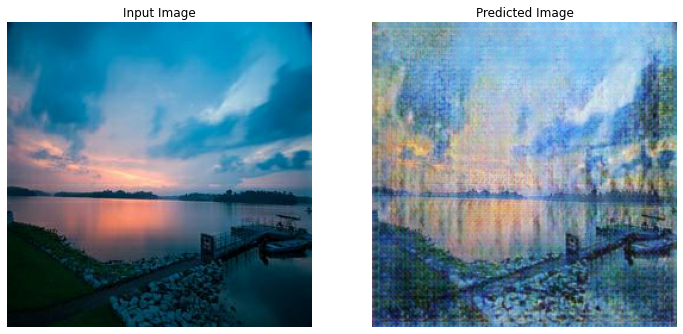

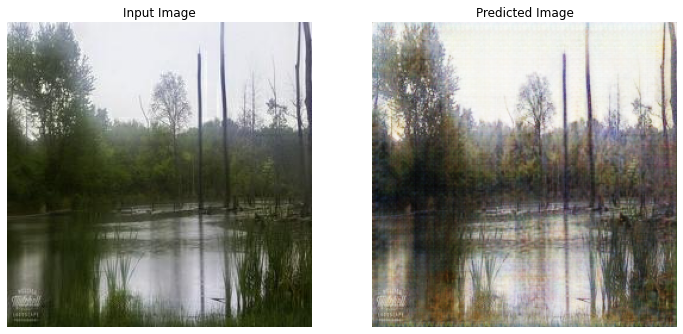

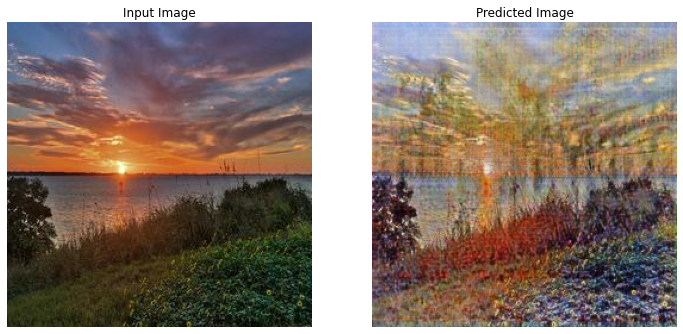

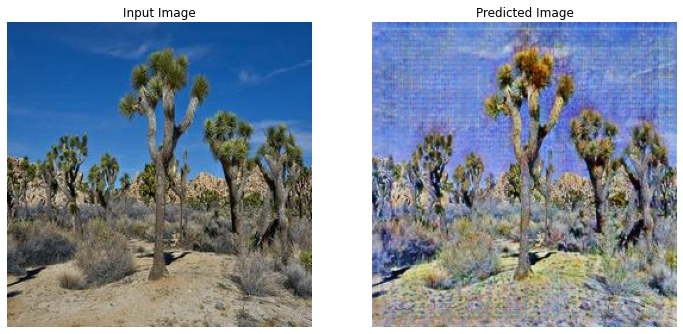

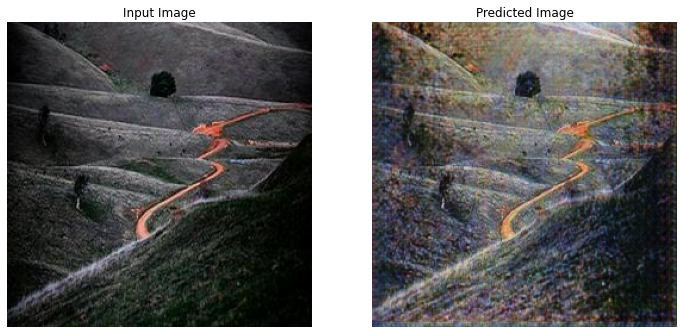

In [36]:
# Function to display generated images
def generate_images(model, test_input):
  prediction = model(test_input)
    
  plt.figure(figsize=(12, 12))

  display_list = [test_input[0], prediction[0]]
  title = ['Input Image', 'Predicted Image']

  for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

NBR_PHOTOS = 5

# We display generated images
for inp in photo_test.take(NBR_PHOTOS):
  generate_images(generator_photoToMonet, inp)

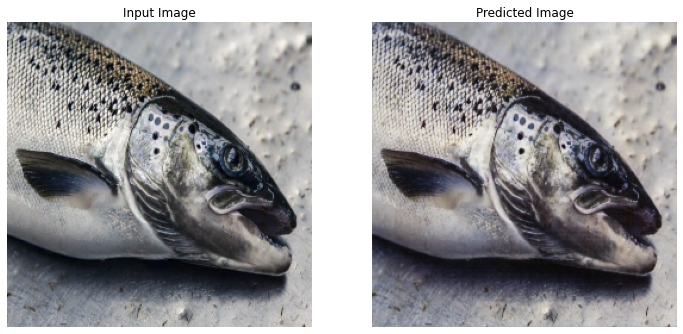

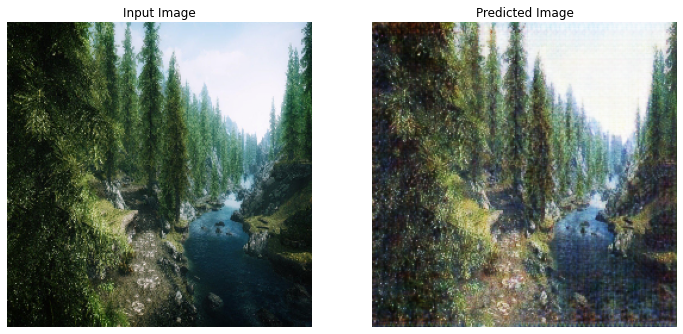

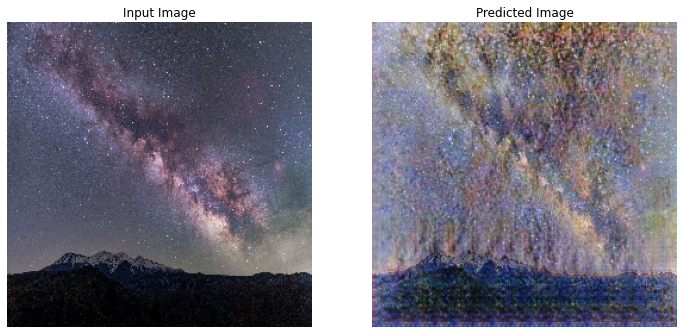

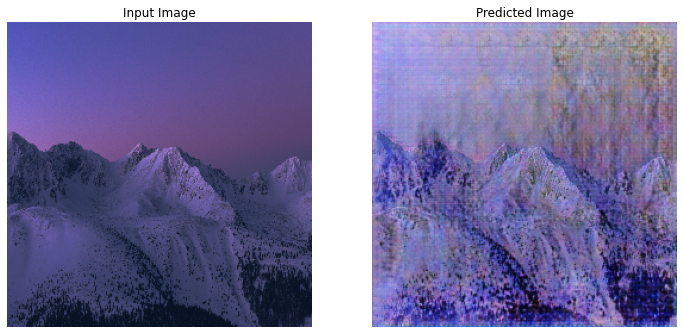

In [38]:
dataset_photo = make_dataset(['/content/thon.png','/content/sky.jpg','/content/mountains_night_stars_212160_3840x2400.jpg','/content/mountains_snow_night_158089_6720x4480.jpg'])
photo_test = dataset_photo

for i in range(len(photo_test)):
  photo_test[i] = preprocess_image_test(photo_test[i])

photo_test = tf.data.Dataset.from_tensor_slices(photo_test).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

NBR_PHOTOS = 4

# We display generated images
for inp in photo_test.take(NBR_PHOTOS):
  generate_images(generator_photoToMonet, inp)